# <span style="color:green"> ESERCITAZIONE 9 </span>

### <span style="color:blue">  Esercizio 09.1 </span>

<span style="color:blue"> Risolvi il **problema del commesso viaggiatore**. Un commesso viaggiatore deve raggiungere delle città, visitandole tutte una volta sola, tornando al punto di partenza e facendo il percorso più breve. In questo viaggio le città sono $34$ e sono disposte prima su una circonferenza, poi all'interno di un quadrato. </span>

L'obiettivo di questo esperimento è **calcolare il percorso più breve** per il commesso viaggiatore. Il percorso è costutito da 34 città, tutte da visitare una volta sola e alla fine il commesso torna nella città di partenza. Il percorso è costituito dalla somma di tutti i segmenti che uniscono le città a coppie. 

Ci sono tanti modi di prendere le coppie di punti e questi producono segmenti di varie lunghezze. Il commesso viaggiatore deve **ottimizzare** la lunghezza del percorso quindi **sceglierà l'ordine delle città che dà origine a quei segmenti che sommati danno la lunghezza totale più breve**. Il commesso viaggiatore sta cercando il **percorso che minimizza la funzione costo** che in questo caso è la **norma** $L(1)$:
\begin{equation}
   L^{(1)}(\vec{x}_1, \vec{x}_2, \dots, \vec{x}_N) = \sum_{i=1}^{N} |\vec{x}_i-\vec{x}_{i+1}|,
\end{equation}

essendo $x_{i}$ e $x_{i+1}$ le coordinate di due città consecutive. Per calcolare la lunghezza totale del percorso, il codice prima calcola con il teorema di Pitagora la lunghezza di un segmento che unisce due punti (due città), ripete il processo con tutte le coppie in sequenza, infine somma le lunghezze di tutti i segmenti. 

In questa Esercitazione per scrivere il codice è stato necessario usare il concetto di classe della programmazione ad oggetti. Le classi implementate nel codice corrispondono agli attori principali del problema: le **città** e le loro possibili sequenze, ossia i **percorsi**.

### Città

La classe **City** rappresenta la città. Questa classe è costituta da tre numeri: l'etichetta che identifica la città e le sue coordinate longitudine e latitudine. La classe City non ha funzioni, se non quelle di comunicare le sue tre componenti. Queste funzioni seppur semplici sono fondamentali, sia per poter calcolare la norma, sia per comunicare l'ordine in cui le città sono disposte nel percorso. 

### Percorso

La classe **Trip** rappresenta il percorso, ossia l'ordine con cui le città vengono raggiunte. L'elemento principale della classe Trip **è un vettore di City** ed è dichiarato così: vector \<City\> m_trip, ossia m_trip eredita sia le funzioni della classe vector di C++, sia le funzioni della classe City sopra indicate. Grazie alla classe vector di C++ è possibile creare vettori i cui elementi sono vettori. Possiamo quindi immaginare m_trip come un **vettore costituito da tante caselline**, ciascuna delle quali è una City, ossia un vettore di tre numeri: un intero e due double. Trip costituisce una classe perché il suo elemento **vettore può svolgere delle funzioni**. Attenzione: queste funzioni valgono per tutto il vettore m_trip e non per la singola City, che può solo comunicare i suoi tre elementi.

### Funzioni base di Trip

Le funzioni alla base di ogni classe sono il costruttore e il distruttore. La classe **Trip si costruisce allocando il vettore m_trip** grazie alla funzione di vector push_back(). Si parte dal vettore vuoto di City dopodiché uno alla volta, si aggiungono gli elementi City alla fine del vettore. Nel codice ho chiamato questo vettore **way**. Quando il vettore è pronto definisco un elemento di tipo Trip che viene costruito semplicemente passando il vettore way. Nel costruttore scrivo m_trip $=$ way, così il vector di City diventa il data member della classe Trip e **acquista tutte le funzioni della classe Trip**.

Le altre **funzioni** fondamentali di Trip sono quelle che, data la posizione nel vettore m_trip, **comunicano le tre componenti della casellina** in quella posizione, una funzione per ogni componente. Senza queste non sarebbe possibile svolgere le operazioni. Se è possibile accedere alle coordinate $x$ e $y$ dei punti, è possibile **calcolare la norma** come indicato sopra. In Trip c'è questa funzione. 

La classe Trip ha altri due data member: la **lunghezza del vettore**, ossia quante City ci sono e la **norma**, ossia la distanza (lunghezza) del percorso.

E' interessante osservare che **se si inverte l'ordine** di qualcuno **degli elementi** del vettore, **cambia la distanza** del percorso. Questo è proprio l'obiettivo dell'esperimento: **trovare la permutazione** degli elementi del vettore **tale per cui la distanza del percorso sia minima**. Questo è il cammino che il commesso viaggiatore desidera percorrere! Per questo nella classe Trip ho scritto delle **funzioni che invertano alcuni degli elementi** del vettore m_trip.

### Per cominciare

Trattandosi di un problema complicato ed essendo $34$ un numero grande di città, ho deciso di cominciare dal risolvere un problema analogo più semplice, con un numero ridotto di elementi. Risolvo un problema in cui devo raggiungere $7$ punti con la stessa metodologia del commesso viaggiatore. Mi sono ispirata alla mia vita quotidiana: il punto di partenza è casa mia e gli altri $6$ punti sono punti del mio quartiere verso cui mi devo recare per commissioni.

Le distanze tra i punti sono in scala rispetto a quelle vere. Per iniziare risolvo quindi un problema di tipo **combinatorio** che scala con il fattoriale del numero dei punti da unire. Il codice esegue tutte le permutazioni possibili dei $6$ elementi, calcola ogni volta la distanza e sceglie la più breve. Ho scritto anche una versione che invece calcola il percorso più lungo. La dimensionalità del problema **scala con il fattoriale**. 

Se $n$ è il numero delle città, il numero delle permutazioni totale è $0.5\times (n-1)!$. Sotraggo $1$ ad $n$ perché la prima città resta fissata e divido per $2$ perché lo stesso percorso in senso orario e antiorario si conta una volta sola. Questo tipo di approccio è efficiente per un piccolo numero di punti.

Per capire quello che dovrò fare per risolvere il vero problema dell'Esercitazione $9$ mi sembra utile riportare le tre figure relative al problema ridotto: i $7$ punti da unire, il percorso migliore e il percorso peggiore. Il punto inizale, che corrisponde al punto finale, ossia casa mia, ha coordinate $(0,0)$. 

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

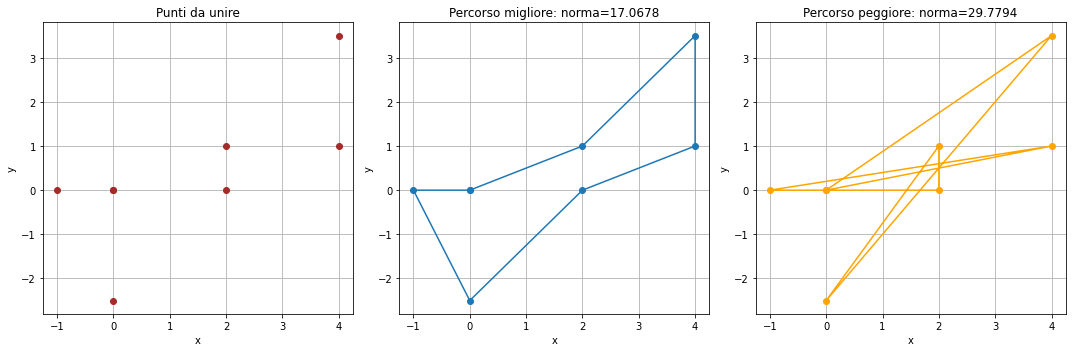

In [2]:
plt.figure(figsize=(15,5))

plt.subplot(131)
x = np.array([0,2,4,4,2,0,-1,0])
y = np.array([0,1,3.5,1,0,-2.5,0,0])
plt.plot(x,y, marker='o', color='brown', linestyle="")
plt.title('Punti da unire')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)

plt.subplot(132)
x = np.array([0,2,4,4,2,0,-1,0])
y = np.array([0,1,3.5,1,0,-2.5,0,0])
plt.plot(x,y, marker='o')
plt.title('Percorso migliore: norma=17.0678')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)

plt.subplot(133)
x = np.array([0,4,-1,2,2,0,4,0])
y = np.array([0,1,0,0,1,-2.5,3.5,0])
plt.plot(x,y, marker='o', color='orange')
plt.title('Percorso peggiore: norma=29.7794')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)

plt.tight_layout()
plt.show()

Per risolvere il problema bisogna unire le $34$ città in modo che la linea assomigli a quella al centro e non a quella a destra. Le coordinate dei punti sono generate random a partire dalla distribuzione desiderata, all'inizio della simulazione. **Il problema va risolto due volte**, con due diverse disposizioni delle citta. 

La prima volta sono **su una circonferenza**, per valutare se il codice funziona correttamente: se l'algoritmo riconosce, come linea che unisce i punti su una circonferenza, una linea spezzata chiusa cha assomiglia ad una circonferenza, **senza incroci né salti** dalla parte opposta, allora il codice ha lavorato bene. Dopo aver appurato che il codice lavora bene, la seconda volta le città si trovano **all'interno di un quadrato**.  

### I due percorsi: sulla circonferenza e nel quadrato

La prima operazione che svolge il codice è **selezionare i valori random** che saranno le coordinate delle città. Per i punti sulla circonferenza viene estratto un angolo $\phi$ nell'intervallo $[0,2\pi)$ e si calcolano $cos(\phi)$ e $sin(\phi)$: queste sono le coordinate delle città. Si ipotizza che la circonferenza abbia raggio $1$. Per i punti nel quadrato si calcolano le coordinate $x$ e $y$ estraendole nell'intervallo $[-1,1)$. Il quadrato così costruito ha lato $2$. Entrambe le figure sono centrate in $(0,0)$. I grafici che seguono rappresentano le città generate estraendo i valori random negli intervalli descritti e combinandoli opportunamente.

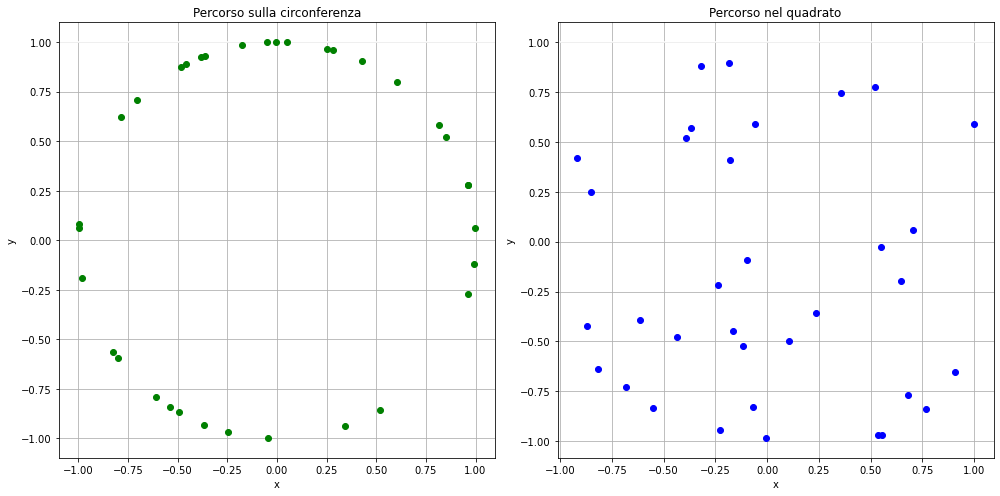

In [2]:
plt.figure(figsize=(14,7))

plt.subplot(121)
x, y = np.loadtxt("Cerchio.dat", usecols=(1,2), delimiter='  ', unpack='true')
plt.axhline(y=1.0, color='white')
plt.plot(x,y, marker='o', color='green', linestyle="")
plt.title('Percorso sulla circonferenza')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)

plt.subplot(122)
x, y = np.loadtxt("Quadrato.dat", usecols=(1,2), delimiter='  ', unpack='true')
plt.axhline(y=1.0, color='white')
plt.plot(x,y, marker='o', color='blue', linestyle="")
plt.title('Percorso nel quadrato')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)

plt.tight_layout()
plt.show()

Nell'esempio con $7$ città per calcolare il percorso più breve è bastato calcolare tutte le permutazioni possibili delle posizioni delle città e scegliere quella con la distanza più breve: questo perché le permutazioni sono in tutto $3.6\times 10^{2}$. Se dovessi lavorare così anche per il vero problema da risolvere, quello da $34$ città, le permutazioni sarebbero $\simeq 4 \times 10^{36}$: troppe affinché questa tecnica sia efficiente, a causa dell'eccesso sia di tempo impiegato, sia di memoria allocata. Per questo motivo utilizzo un altro strumento di lavoro: gli algoritmi genetici.

### Algoritmi genetici

Proprio come nell'Esercitazione $8$, anche in questa Esercitazione l'algoritmo che risolverà il problema appartiene alla categoria degli **algoritmi metauristici**. Se nella scorsa Esercitazione il processo della natura a cui ci siamo ispirati è il raffreddamento di un liquido che porta alla realizzazione della fase solida cristallina, in questa Esercitazione **ci ispiriamo alla biologia**, in particolare alla genetica e all'evoluzione della specie.

Gli **algoritmi genetici** sono algoritmi che **simulano il processo di evoluzione** partendo da una **popolazione iniziale** e applicando ad essa gli operatori genetici che la fanno evolvere. Questi algoritmi sono ispirati ai fenomeni naturali del **perpetuarsi della specie** e della **selezione naturale**. 

Consideriamo una popolazione di animali della stessa specie che vivono in un determinato ambiente: questi fanno dei figli che a loro volta fanno dei figli e questo avviene per tante generazioni. Se andiamo a vedere la popolazione finale, osserviamo che non è proprio identica a quella iniziale: alcune sue caratteristiche saranno cambiate per adattarsi all'ambiente. I figli che saranno riusciti a sopravvivere sono quelli che si saranno adattati al meglio all'ambiente.

Nell'ambito degli algoritmi genetici possiamo vedere il **problema da risolvere** come l'**ambiente** a cui adattarsi al meglio e un **insieme di soluzioni possibili** come la **popolazione** che deve evolvere. Nel caso specifico del problema del commesso viaggiatore la **popolazione** delle soluzioni possibili sono le possibili permutazioni delle città, ossia **i possibili percorsi e** quelli che **si adattano meglio all'ambiente** sono **quelli che ne minimizzano la distanza**. 

A differenza dell'Esercitazione $8$, non possiamo risolvere questo problema calcolando delle derivate per cercare il minimo: gli elementi del problema sono una sequenza di numeri interi e dobbiamo metterli nell'ordine giusto. Dobbiamo **ottimizzare un problema combinatorio**. L'aspetto negativo di questo tipo di algoritmi è che sono onerosi dal punto di vista computazionale. Tuttavia gli algoritmi genetici presentano anche dei pregi.

1. **Lavorano usando l'informazione diretta**. Nel caso di questa Esercitazione modifichiamo direttamente la sequenza delle città. Il calcolo della derivata ci indicherebbe la direzione verso cui andare. Qui invece lavoriamo direttamente sull'oggetto interessato.
2. **Danno una risposta che migliora nel tempo**. Andando avanti nelle generazioni, nascono individui che risolvono sempre meglio il problema.

### La popolazione e la sua evoluzione

Nel caso di questo problema da risolvere, la **popolazione** che deve evolvere è costituita da tanti vettori che rappresentano un possibile percorso: è un **vector di Trip**. La popolazione è un vector i cui elementi sono di tipo Trip.  La classe Trip è costituita dal data member vector di City più tutte le sue funzioni. Il vector di City per evolvere deve essere **modificato**: per questo è dotato delle **funzioni**. Generiamo tanti percorsi, in modo da trovare quelli con distanza minore.

Facendo un'altra analogia con la biologia, possiamo vedere così gli elementi del problema:
1. **popolazione**: insieme di tanti cromosomi che devono evolvere per adattarsi all'ambiente;
2. **cromosoma**: vettore di città, ciascuno dei quali è un possibile percorso, costituito da tanti geni;
3. **gene**: la città, il singolo elemento del vettore, che può acquisire $34$ valori possibili;
4. **allele**: ciascuno dei $34$ valori possibili. In ogni vettore le città sono sempre le stesse, a cambiare è il loro ordine.

Per modificare un cromosoma ci sono due tecniche: la mutazione e il crossover.
1. **Mutazione**: conversione di un gene da un tipo ad un altro. In questo caso viene modificata la città che occupa una posizione.
2. **Crossover**: quando due cromosomi vengono selezionati come genitori si scambiano una parte dei geni. Il risultato sono i figli.

Nel codice sono implementate le funzioni che effettuano le mutazioni e il crossover. 

### Mutazione

Le funzioni che effettuano le mutazioni si trovano nella classe Trip: la logica è che il vettore di City possa agire su se stesso e modificarsi. Le mutazioni aggiungono diversità nella popolazione. Ecco i **tipi di mutazione** implementati.
1. **Permutazione di una coppia** di città: prendo due città e le scambio di posto nel vettore.
2. **Shift di $+n$ posizioni per $m$** città contigue: prendo $m$ città consecutive e le sposto tutte in avanti di $n$ posizioni nel vettore.
3. **Permutazione di due blocchi** di città: seleziono due blocchi della stessa lunghezza di città consecutive e li scambio di posto.
4. **Inversione dell'ordine** in cui le città si trovano: seleziono un blocco di città nel vettore e ne inverto l'ordine delle posizioni.

Le mutazioni **non interessano il primo elemento** del vettore: la città iniziale deve essere la stessa per tutti i cromosomi e per tutte le popolazione a venire. Inoltre all'interno del cromosoma **non ci possono essere città ripetute**: le città vengono spostate da una posizione ad un'altra nel vettore, ossia i geni si spostano nel cromosoma, ma non vengono ripetuti. Per evitare questi inconvenienti, sono state implementate due funzioni: 
1. **check first** che controlla che il primo elemento del vettore sia sempre lo stesso per tutta la popolazione, quello che ha label $=1$;
2. **check equal** che controlla che tutti gli elementi del vettore siano diversi tra di loro.

Sono funzioni della classe Trip. Nel caso in cui le funzioni riscontrano che esistono dei vettori che non rispettano i requisiti per essere accettati, li eliminano.

### Crossover

Il crossover consiste nel prendere **due elementi** della popolazione e fare loro **scambiare una parte di loro stessi**. I due elementi hanno la stessa lunghezza. Ad una certa posizione ugale per entrambi i genitori **si fa un taglio** e dopo lo scambio, la parte a **sinistra** del taglio **resta la stessa**, mentre la parte a **destra** è quella che **apparteneva all'altro genitore**. Abbiamo detto però che tutti gli elementi del vettore devono essere diversi, perché ogni città può essere visitata una volta sola. Facendo il taglio e scambiando semplicemente i pezzi si troverebbero in ogni vettore alcune  città ripetute e altre mancanti. 

Allora in che cosa consiste questo scambio? Ecco il procedimento.
1. Faccio il taglio alla stessa posizione per entrambi i genitori. La posizione è un numero intero generato casualmente nell'intervallo $[1,31]$, ossia gli elementi che posso scambiare sono quelli dal numero $1$, perché lo $0-$esimo non può cambiare, al numero $31$, ossia il terzultimo e due restano alla sua destra. Fare il taglio il fondo al vettore non ha senso perché non ci sarebbe nessuno scambio. Anche fare il taglio all'ultimo posto non comporta scambio perché a destra del taglio ci sarebbe solo un elemento e il suo posto può essere solo quello in fondo. Ha senso fare il taglio in modo che alla sua destra ci siano almeno due elementi, che possono essere invertiti.
2. I geni/città del cromosoma/percorso a **sinistra** del taglio restano in **ordine invariato** per entrambi i genitori.
3. In ciascun genitore controllo **quali geni ha**, che sono quelli a sinistra del taglio e **quali a lui mancano** ma che ha il suo partner. 
4. In ciascun genitore, nella parte a **destra** del taglio, **scrivo i geni** che a lui mancano, **nell'ordine in cui sono presenti nel partner**.
5. **Sono nati** due nuovi elementi della popolazione, **i figli**, che andranno a sostituire i genitori. 

Dunque non è uno **scambio** di elementi nel vero senso della parola, ma è un **mettere in ordine** gli elementi di un vettore copiando l'ordine di un altro vettore. Quello che bisogna fare adesso è stabilire il criterio con quale selezionare i genitori che daranno origine alla nuova generazione.

### La roulette truccata

Abbiamo detto che, affinché la popolazione si evolva sempre in meglio di generazione in generazione, vale il principio di adattamento all'ambiente, ossia gli elementi che sopravviveranno e che **faranno figli** saranno quelli che sapranno **adattarsi al meglio** alle difficoltà che la vita e l'ambiente porranno loro dinanzi. Nel caso specifico del nostro problema, stiamo cercando le **candidate soluzioni migliori**, ossia quelle che **minimizzano la funzione costo**, in questo caso la distanza del percorso e tra queste, andando avanti con le generazioni, si troverà la più corta in assoluto. 

La difficoltà alla quale gli individui dovranno sopravvivere e adattarsi è avere una distanza più piccola rispetto alla media, in modo da essere selezionati per riprodursi. Questo vuol dire che, attraverso le generazioni, saranno **selezionati con una probabilità maggiore** gli elementi che hanno **distanza minore**. 

Lo strumento che utilizzeremo per truccare la probabilità di estrazione tra gli elementi della popolazione è la **roulette truccata**. Questa funziona come un dado con le facce truccate: si mette un peso su una delle sei facce e quella dalla parte opposta ha probabilità più alta di uscire rispetto alle altre. In analogia, nel nostro caso, gli elementi della popolazione saranno estratti con una **distribuzione di probabilità che ha un peso maggiore** sugli elementi che hanno una **distanza minore**. Si effettua la selezione dopo aver **ordinato in ordine crescente della distanza** degli elementi della popolazione.

L'algoritmo che l'operatore di selezione usa per selezionare un individuo $j$ tra una popolazione di $M$ individui è dato dalla formula:

\begin{equation}
   j = int \left( M \times r^{p} \right) \quad \quad r \in \left[ 0,1 \right)
\end{equation}

$r$ è un numero random e $p$ è un esponente opportuno. La figura sotto riporta alcuni esempi di $r^{p}$, con l'obiettivo di scegliere un valore $p$ opportuno.

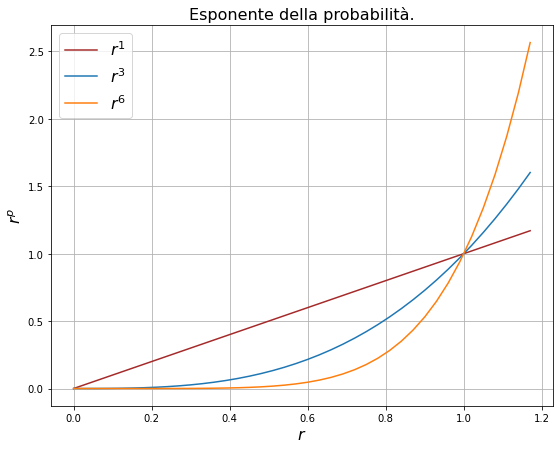

In [3]:
plt.figure(figsize=(9,7))

r = np.arange(0.0, 1.2, 0.03)
s1 = r
plt.plot(r, s1, label="$r^{1}$", color='brown')
s2 = r**3
plt.plot(r, s2, label="$r^{3}$")
s3 = r**6
plt.plot(r, s3, label="$r^{6}$")

plt.title('Esponente della probabilità.', fontsize=(16))
plt.xlabel('$r$', fontsize=(16))
plt.ylabel('$r^{p}$', fontsize=(16))

plt.legend(fontsize=(16))
plt.grid(True)
plt.show()

Sia $r$ un numero random uniforme nell'intervallo $[0,1)$, la sua immagine $y=r^{p}$ rappresenta la **probabilità truccata** che questo valore sia estratto. Vogliamo trovare il valore di $p$ che meglio trucca la roulette. Osserviamo gli esempi della figura.

1. $p=1$. La probabilità resta invariata perché è una retta $y=x$.
2. $p=3$. La curva della probabilità si schiaccia verso il basso. Questo vuol dire che, rispetto al caso precedente, a parità di $x$ si trova una $y$ più piccola. 
3. $p=6$. Aumentando l'esponente, la curva si schiaccia sempre di più verso il basso. All'inizio i valori sono vicini allo $0$ e poi crescono rapidamente a $1$.

Affinché $r^{p}$ si trasformi nel numero che indica il percorso che seleziono nel vettore popolazione, bisogna moltiplicarlo per $M=$ numero di elementi della popolazione e renderlo un intero, in modo che parta da $0$ e che prenda gli elementi fino all'$M-1-$esimo. Gli elementi $M$ sono ordinati nel vettore in modo che **all'inizio** ci siano **i migliori**, ossia quelli con **distanza più piccola** e in fondo i peggiori, ossia quelli con distanza maggiore. Mediante la roulette truccata vorremmo **selezionare** con probabilità maggiore gli elementi **all'inizio del vettore**.

Se vogliamo fare una roulette truccata, non ha senso prendere $p=1$ perché gli elementi sarebbero di nuovo equiprobabili. Un buon valore è $p=3$ perché la curva favorisce l'estrazione di elementi prossimi allo $0$ che nella formula diventano i valori interi più vicini a $0$ e più lontani da $M-1$. Lo preferisco a $p=6$ perché questo farebbe un taglio troppo drastico. Desideriamo che **tutti** gli elementi della popolazione **abbiano la possibilità di essere selezionati** e di riprodursi, quello che deve **variare** è la **probabilità con cui questo accade**. 

Questo vuol dire che anche l'elemento meno virtuoso della popolazione può essere selezionato ma con una probabilità molto piccola e che gli **elementi più virtuosi siano favoriti**. Con esponente $p$ troppo alto l'algoritmo sceglierebbe solo i migliori. Invece noi vorremmo solo che i migliori siano i favoriti **ma non gli unici** a poter mandare avanti la popolazione nelle generazioni. A questo fine l'esponente $p=3$ è il più indicato nella roulette truccata.

Sia il voler prendere tutti in considerazione per riprodursi, sia l'inserire delle mutazioni in ogni generazione, servono a **conferire varietà** nella popolazione. Avere tanti individui diversi tra di loro ed esplorarli tutti ci avvicina sempre di più al **ritrovamento dell'individuo più giusto** per la soluzione del problema, il **best** della popolazione, che nel nostro caso è il percorso più breve che congiunge le $34$ città.

### Come si genera una popolazione e come evolve

Gli strumenti di cui l'algoritmo genetico dispone per generare una nuova popolazione sono il crossover e la mutazione. Vediamo ulteriori caratteristiche.

1. **Crossover**. E' lo strumento più efficace per generare nuovi individui sempre diversi. Ha però un aspetto di **rischio**: si potrebbero perdere degli elementi molto buoni. Il rischio viene compensato dal fatto che grazie a lui si generano tanti altri individui sempre diversi e che possono essere migliori dei genitori. 
2. **Mutazione**. Una volta generata la popolazione tramite crossover, si effettua su una piccola percentuale la mutazione di alcuni geni. Questo si fa per **esplorare nuove possibilità**, evitando lo stagnare della popolazione. Potrebbe infatti accadere durante una simulazione, di addentrarsi in un minimo locale: questo lo vorremmo evitare e se ci è già capitato, vorremmo uscirne al più presto. La mutazione ci aiuta in questo compito. 

Vediamo un esempio di **processo** con cui è possibile generare le popolazioni con l'algoritmo genetico: ho usato questo per risolvere l'Esercitazione $9$. 

1. **Genero la popolazione iniziale**. Nel codice genero uno alla volta tanti individui tutti uguali e poi li modifico applicando su loro le mutazioni. Gli individui della popoalzione sono costituiti di $34$ geni e le mutazioni applicate su ciascun individuo sono un terzo dei geni che possono cambiare. 
2. **Graduatoria fitness**. Generata la popolazione, misuro la funzione costo per ciascun individuo, in questo caso la distanza e li metto in ordine in base alla distanza crescente. I primi sono i migliori perché minimizzano la funzione costo e sono dunque i favoriti per la riproduzione. 
3. **Elitarismo**. L'$1\%$ (o meno) degli elementi in cima alla graduatoria fitness vanno di diritto alla generazione successiva. 
4. **Scelta dei genitori**. Con l'operatore di selezione, in questo caso la roulette truccata, seleziono nella pooplazione i genitori che si riprodurranno. L'operatore seleziona con probabilità maggiore i primi della graduatoria. Lo stesso genitore può essere selezionato più di una volta. 
5. **Crossover**. Selezionati i due genitori, avviene tra di loro lo scambio del materiale genetico e nascono i loro due figli. Il $99\%$ circa degli elementi della popolazione della generazione successiva nasce così. 
6. **Mutazione**. Generati tutti gli elementi della popolazione per crossover, il $10\%$ di loro sono estratti a sorte, tutti con la stessa probabilità e su di loro sono applicate le mutazioni, una mutazione per ciascuno dei selezionati. 
7. **Sostituzione**. Tutti gli elementi della vecchia popolazione sono stati rimpiazzati dai loro figli: il testimone è passato alla generazione successiva.
8. **Evoluzione**. Ripeto i passaggi dal $2$ al $7$ per un certo numero di volte: la popolazione evolve di generazione in generazione. 
9. **Uscita**. Dopo un certo numero di generazioni, quando la metà migliore degli elementi sono simili tra di loro e quindi simili al migliore in assoluto, si interrompe il processo. Il numero di generazioni totali è stabilito all'inizio. 

### Esecuzione, risultati e grafici

Ho deciso di prendere la **popolazione** di $400$ individui, quindi ad ogni generazione ci sono $4$ elementi che partecipano all'elitarismo e gli altri $396$ posti vengono assegnati tramite crossover. Ad ogni generazione vengono selezionate $2\times 396$ coppie di genitori, favorendo quelli in cima alla classifica dei migliori. Essendo la roulette truccata, lo stesso genitore può essere selezionato più di una volta. Generata la popolazione, su $40$ di loro viene applicata una mutazione. Chi sarà mutato viene selezionato a sorte nella popolazione e tutti hanno la stessa probabilità di essere selezionati: qui non c'è una roulette truccata. 

Ho deciso che il numero di generazioni totali è $200$. Il numero di **generazioni** necessarie per convergere alla soluzione finale dipende dal numero di elementi della popolazione: più è numerosa la popolazione, meno generazioni servono. Nel caso di $400$ individui, si ottiene la convergenza in $130$ generazioni per la circonferenza e in $75$ generazioni per il quadrato. Vengono riportati di seguito i grafici relativi a come variano, con il progredire delle generazioni: 

1. la lunghezza del percorso migliore per la circonferenza,
2. la lunghezza media per la metà migliore della popolazione per la circonferenza,
3. la lunghezza del percorso migliore per il quadrato,
4. la lunghezza media per la metà migliore della popolazione per il quadrato.

In [3]:
gen_c, best_c, mean_c = np.loadtxt("best_distance_circle.dat", usecols=(0,1,2), delimiter='  ', unpack='true')

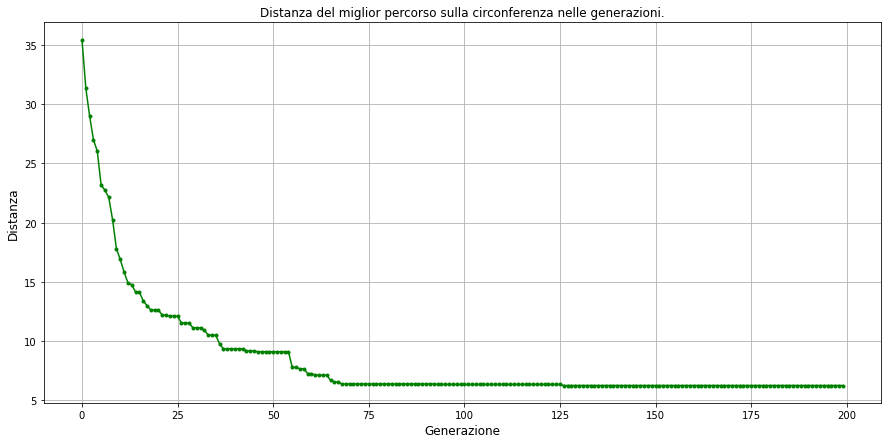

In [6]:
plt.figure(figsize=(15,7))
plt.plot(gen_c,best_c, marker='.', color='green')

plt.title('Distanza del miglior percorso sulla circonferenza nelle generazioni.')
plt.xlabel('Generazione', fontsize=(12))
plt.ylabel('Distanza', fontsize=(12))

plt.grid(True)
plt.show()

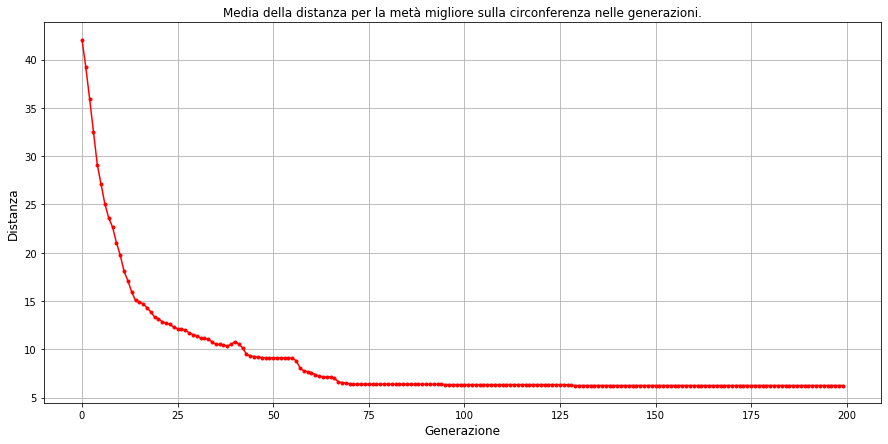

In [7]:
plt.figure(figsize=(15,7))
plt.plot(gen_c,mean_c, marker='.', color='red')

plt.title('Media della distanza per la metà migliore sulla circonferenza nelle generazioni.')
plt.xlabel('Generazione', fontsize=(12))
plt.ylabel('Distanza', fontsize=(12))

plt.grid(True)
plt.show()

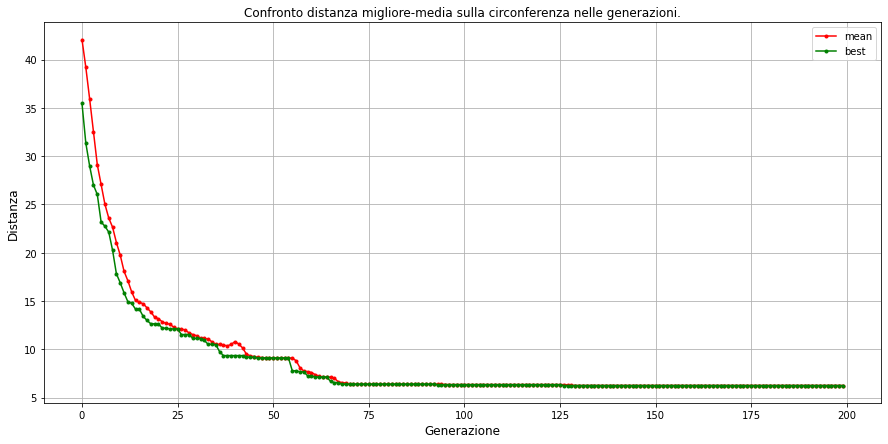

In [13]:
plt.figure(figsize=(15,7))
plt.plot(gen_c,mean_c, marker='.', color='red', label='mean')
plt.plot(gen_c,best_c, marker='.', color='green', label='best')

plt.title('Confronto distanza migliore-media sulla circonferenza nelle generazioni.')
plt.xlabel('Generazione', fontsize=(12))
plt.ylabel('Distanza', fontsize=(12))

plt.legend()
plt.grid(True)
plt.show()

In [15]:
gen_s, best_s, mean_s = np.loadtxt("best_distance_square.dat", usecols=(0,1,2), delimiter='  ', unpack='true')

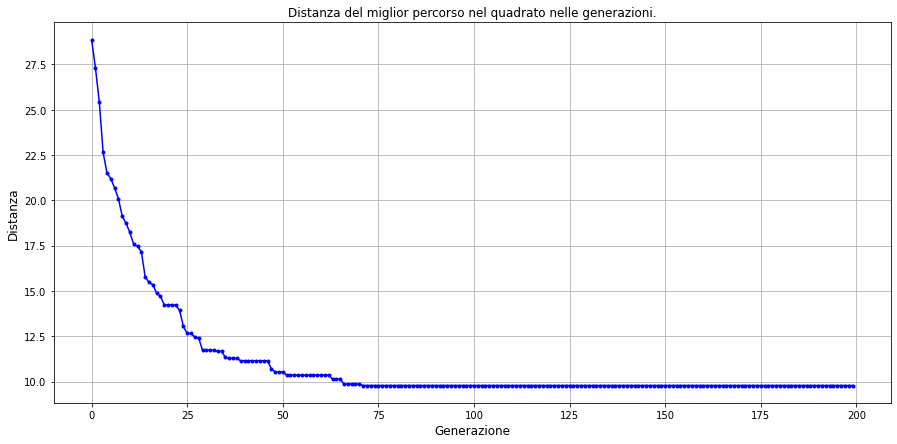

In [16]:
plt.figure(figsize=(15,7))
plt.plot(gen_s,best_s, marker='.', color='blue')

plt.title('Distanza del miglior percorso nel quadrato nelle generazioni.')
plt.xlabel('Generazione', fontsize=(12))
plt.ylabel('Distanza', fontsize=(12))

plt.grid(True)
plt.show()

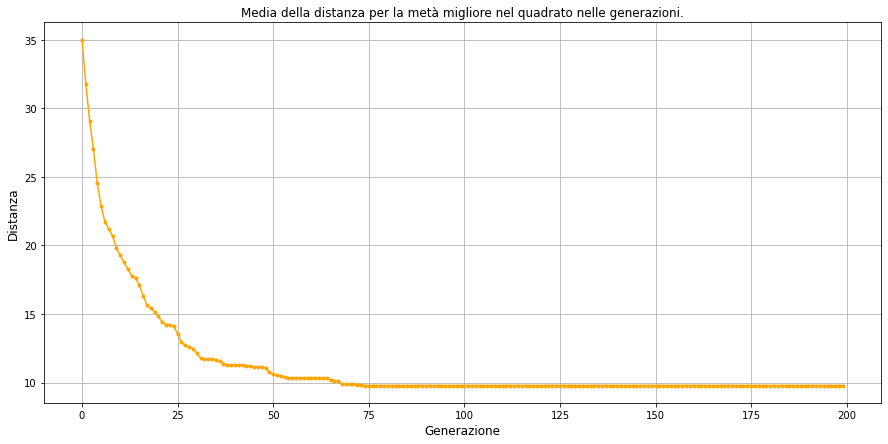

In [17]:
plt.figure(figsize=(15,7))
plt.plot(gen_s,mean_s, marker='.', color='orange')

plt.title('Media della distanza per la metà migliore nel quadrato nelle generazioni.')
plt.xlabel('Generazione', fontsize=(12))
plt.ylabel('Distanza', fontsize=(12))

plt.grid(True)
plt.show()

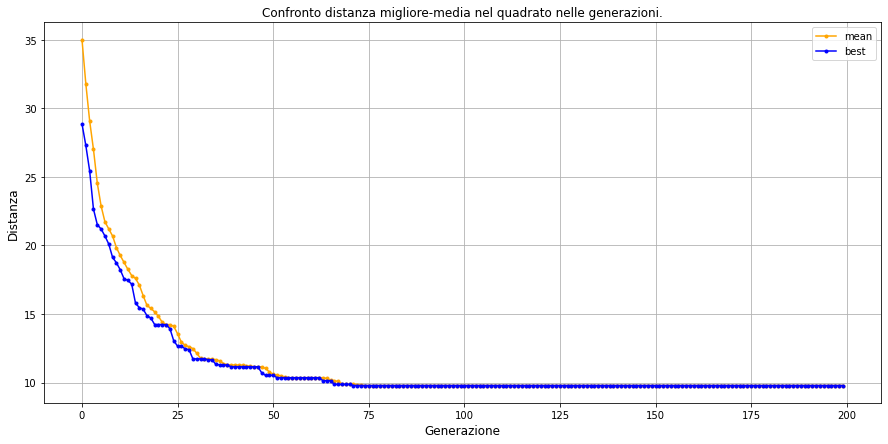

In [18]:
plt.figure(figsize=(15,7))
plt.plot(gen_s,mean_s, marker='.', color='orange', label='mean')
plt.plot(gen_s,best_s, marker='.', color='blue', label='best')

plt.title('Confronto distanza migliore-media nel quadrato nelle generazioni.')
plt.xlabel('Generazione', fontsize=(12))
plt.ylabel('Distanza', fontsize=(12))

plt.legend()
plt.grid(True)
plt.show()

Le **distanze relative ai percorsi migliori** che vengono raggiunte sono: $L=6.24439$ per la circonferenza e $L=9.78191$ per il quadrato. 

Nel caso della circonferenza, essendo di raggio $r=1$, ci aspettavamo che la distanza si avvicinasse a $2\pi r\simeq 6.28$ e viene così. $L$ viene leggermente minore del valore atteso perché il percorso è fatto di **tanti segmenti dritti** e non è una circonferenza rotonda. Abbiamo usato il caso della circonferenza per **verificare il corretto funzionamento** dell'algoritmo: in questo caso sappiamo che cosa deve venire, per tutto il resto no. Effettuato il test, abbiamo applicato lo stesso algoritmo al caso del quadrato. Seguono i grafici ai percorsi migliori per i due casi. Ci aspettiamo che il **percorso migliore** sia quello che:

1. **unisca tutti** i punti, 2. **si chiuda**, ossia il punto iniziale è uguale al punto finale, 3. **passi** da ogni punto **una volta** sola, 4. **non** ci siano **incroci**.

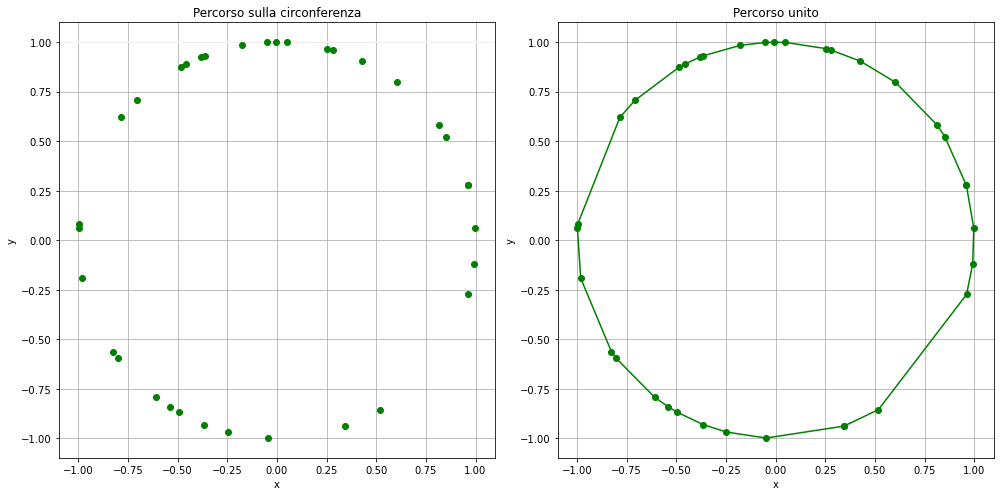

In [19]:
plt.figure(figsize=(14,7))

plt.subplot(121)
x, y = np.loadtxt("Cerchio.dat", usecols=(1,2), delimiter='  ', unpack='true')
plt.axhline(y=1.0, color='white')
plt.plot(x,y, marker='o', color='green', linestyle="")
plt.title('Percorso sulla circonferenza')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)

plt.subplot(122)
x, y = np.loadtxt("best_path_circle.dat", usecols=(1,2), delimiter='  ', unpack='true')
plt.plot(x,y, marker='o', color='green')
plt.title('Percorso unito')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)

plt.tight_layout()
plt.show()

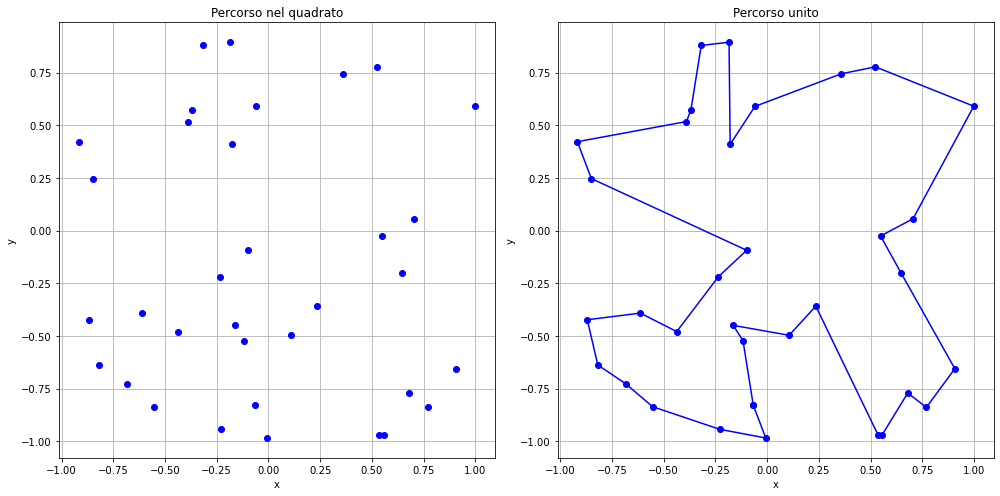

In [20]:
plt.figure(figsize=(14,7))

plt.subplot(121)
x, y = np.loadtxt("Quadrato.dat", usecols=(1,2), delimiter='  ', unpack='true')
plt.plot(x,y, marker='o', color='blue', linestyle="")
plt.title('Percorso nel quadrato')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)

plt.subplot(122)
x, y = np.loadtxt("best_path_square.dat", usecols=(1,2), delimiter='  ', unpack='true')
plt.plot(x,y, marker='o', color='blue')
plt.title('Percorso unito')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)

plt.tight_layout()
plt.show()

### Conclusioni

L'obiettivo di questo esperimento era risolvere il **problema del commesso viaggiatore**, ossia aiutare un commesso viaggiatore a trovare il percorso più breve che congiunga tutte le città che egli vuole visitare per svolgere il suo lavoro. L'approccio spontaneo sarebbe risolvere il **problema combinatorio** che scala con il fattoriale delle città da visitare. Questo metodo risolutivo è conveniente per un percorso di poche città, circa $7$ e diventa probitivo per un numero superiore.

Allora abbiamo optato per gli **algoritmi genetici** che producono ad ogni generazione, delle **candidate soluzioni al problema sempre migliori**, fino a convergere a quella più giusta in assoluto. Ad ogni generazione le soluzioni vengono **ordinate** dalla migliore alla peggiore. Gli operatori fondamentali di questi algoritmi sono: **selezione** dei genitori selezionando con una probabilità maggiore chi si trova tra i migliori, **crossover** del patrimonio genetico dei genitori selezionati e **mutazione** del patrimonio genetico di alcuni degli elementi della popolazione estratti a caso senza preferenze.

Nel corso delle generazioni le **candidate soluzioni diventano sempre più precise fino** ad essere tutte uguali **alla soluzione** del problema. I grafici relativi alla distanza che decresce mostrano proprio questo andamento e i grafici relativi alle coordinate del miglior percorso calcolato alla fine della simulazione mostrano proprio il **percorso più breve**, sia per il percorso sulla circonferenza, sia nel quadrato. Ora il percorso del commesso viaggiatore è ottimizzato!